
# Data Analysis for cost of care in healthcare
_by Hafsa Laeeque_

---
The task is to<br>
  > 1) analyze the **clinical and financial data** of patients hospitalized for a _certain condition_.<br>
    ~~2) join data given in the different tables.~~<br>
    3) find insights about **drivers of cost of care**.<br>
    4) document _approach, results and insights_ using [slides](https://docs.google.com/presentation/d/1-gYni51iGkYh4OCCr-BYKAV3YqUH4OzQOUAtz5MkrEg/edit?usp=sharing) and a [document](https://docs.google.com/document/d/1fQB0AP2ue_zKVUUAHx_1sJ626okOMtm_IdLOnw-9__A/edit?usp=sharing), both of which should have a similar narrative.<br>

---
We have cleaned and combined our data in [part 1](https://github.com/hafsalaeeque/cost-in-healthcare-DS-proj/blob/master/Analysis%20for%20healthcare%20-%20Part%201.ipynb).<br>
There are 2 types of dataset:
    - `bill_per_patient`, it has 3000 patients' bill along with their personal details,
    - `patient`, it has 3400 entries of 3000 patients' hospital admission dates along with their personal details & medical reports.
    
Based on the data, we will assume that for each time a patient was admitted, his weight,length of stay in hospital and health conditions were different and therefore, it accounts for the difference in amount billed for each admission. Thus, we will treat each entry in the `patient` as unique.<br>

We will also study `bill_per_patient` to understand if personal factors like age, gender, ethnicity group and citizenship affects cost of bill.


## Analysing the datasets
### Import packages

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta 
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [3]:
#display columns and rows
pd.options.display.max_columns = 50
pd.options.display.max_rows = 4000

### (A) Load the datasets
A1 - Let's load the first dataset `bill_per_patient.csv`.

In [20]:
df_bill = pd.read_csv('clean_datasets/bill_per_patient.csv')

In [22]:
df_bill.drop(['Unnamed: 0'], axis=1, inplace =True)

In [23]:
df_bill.head()

,patient_id,gender,race,resident_status,date_of_birth,amount,age
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14,19564.166266,47.0
1,5b6477c5de78d0b138e3b0c18e21d0ae,Female,Chinese,Singaporean,1976-02-18,20465.398960,42.0
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singaporean,1982-07-03,21014.300917,36.0
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singaporean,1947-06-15,45452.313094,71.0
4,541ad077cb4a0e64cc422673afe28aef,Male,Chinese,Singaporean,1970-12-12,22511.346126,47.0


In [25]:
df_bill.describe(include = 'all')

,patient_id,gender,race,resident_status,date_of_birth,amount,age
count,3000,3000,3000,3000,3000,3000.000000,3000.000000
unique,3000,2,4,3,2746,NaN,NaN
top,582701da165f01280a2cdd1d047c08c6,Male,Chinese,Singaporean,1975-08-20,NaN,NaN
freq,1,1503,1915,2392,4,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,24773.613948,57.193667
std,NaN,NaN,NaN,NaN,NaN,13846.477234,14.599722
min,NaN,NaN,NaN,NaN,NaN,2946.100354,27.000000
25%,NaN,NaN,NaN,NaN,NaN,15612.050486,45.000000
50%,NaN,NaN,NaN,NaN,NaN,21815.197138,55.000000
75%,NaN,NaN,NaN,NaN,NaN,29985.749788,70.000000


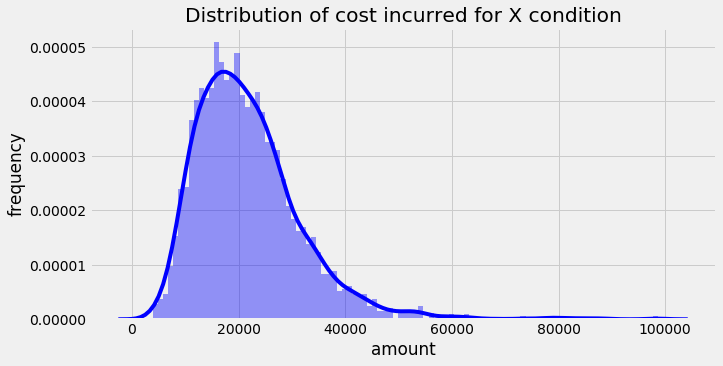

In [51]:
plt.figure(figsize=(10,5))
plt.xlabel('bill incurred')
plt.ylabel('frequency')
plt.title('Distribution of cost incurred for X condition')
sns.distplot(df['amount'], bins = 100, kde = True, color ='b')

In [50]:
print df.amount.mean()
print df.amount.median()

21859.0712559
20180.02


The distribution graph is right-skewed, therefore the mean (average of patients) of the bill paid is higher than the median (average of 2 middle values).

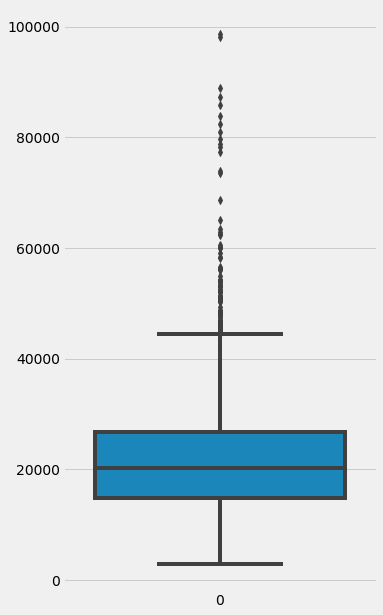

In [44]:
plt.figure(figsize=(5, 10))
sns.boxplot(data=df.amount)

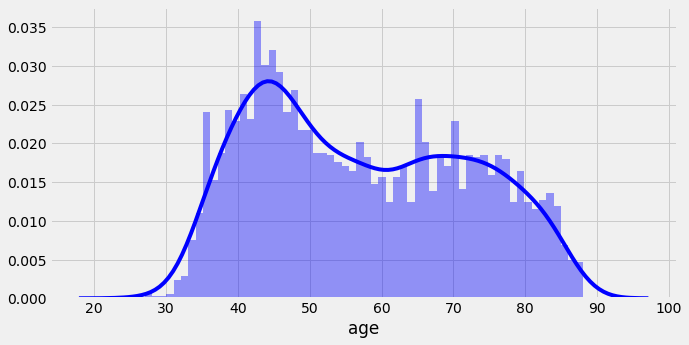

In [52]:
plt.figure(figsize=(10,5))

sns.distplot(df['age'], bins = 60, kde = True, color ='b')

In [60]:
print df.age.mean()
print df.age.value_counts().head(10)

print df.age.value_counts().tail(10)

57.2311764706
43.0    124
45.0    111
44.0    104
46.0    101
48.0     93
41.0     91
65.0     89
39.0     84
47.0     83
36.0     83
Name: age, dtype: int64
86.0    17
87.0    13
33.0    10
32.0     8
88.0     3
28.0     2
31.0     2
27.0     1
29.0     1
30.0     1
Name: age, dtype: int64


The age is slightly right-skewed. Most of the patients are in their mid-forties while a few of them are affected in their late eighties and their late twenties to early thirties. 

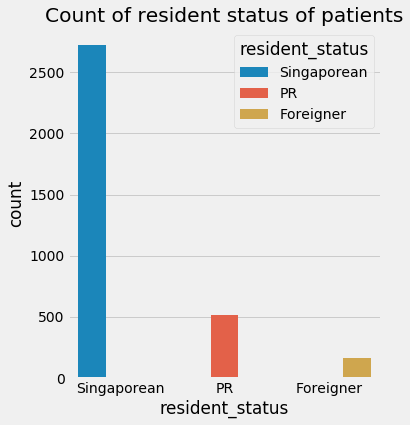

In [75]:
plt.figure(figsize=(5,6))
plt.xlabel('resident status of patients')
plt.ylabel('count')
plt.title('Count of resident status of patients')
sns.countplot(df['resident_status'], hue = df.resident_status)

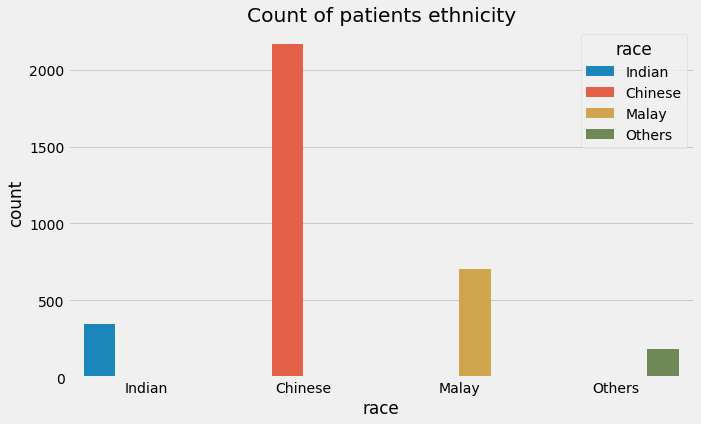

In [77]:
plt.figure(figsize=(10,6))
plt.xlabel('ethnicity of patients')
plt.ylabel('count')
plt.title('Count of patients ethnicity')
sns.countplot(df['race'], hue = df.race)

In [78]:
df.race.value_counts()

Chinese    2166
Malay       707
Indian      344
Others      183
Name: race, dtype: int64

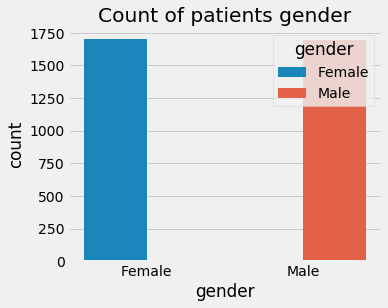

In [82]:
plt.figure(figsize=(5,4))
plt.xlabel('gender')
plt.ylabel('count')
plt.title('Count of patients gender')
sns.countplot(df['gender'], hue = df.gender)

In [83]:
df.gender.value_counts()

Female    1702
Male      1698
Name: gender, dtype: int64



---
A2 - Let's load the second dataset `patients.csv`.

In [17]:
df = pd.read_csv('clean_datasets/patients.csv')

In [18]:
df.shape

(3400, 35)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 35 columns):
Unnamed: 0            3400 non-null int64
patient_id            3400 non-null object
gender                3400 non-null object
race                  3400 non-null object
resident_status       3400 non-null object
date_of_birth         3400 non-null object
date_of_admission     3400 non-null object
date_of_discharge     3400 non-null object
medical_history_1     3400 non-null int64
medical_history_2     3167 non-null float64
medical_history_3     3400 non-null float64
medical_history_4     3400 non-null int64
medical_history_5     3096 non-null float64
medical_history_6     3400 non-null int64
medical_history_7     3400 non-null int64
preop_medication_1    3400 non-null int64
preop_medication_2    3400 non-null int64
preop_medication_3    3400 non-null int64
preop_medication_4    3400 non-null int64
preop_medication_5    3400 non-null int64
preop_medication_6    3400 non-null int6

In [7]:
df.head()

,Unnamed: 0,patient_id,gender,race,resident_status,date_of_birth,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,freq,days_admitted,age,amount
0,0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14,2014-09-20,2014-10-04,0,0.0,0.0,0,0.0,0,1,1,0,1,0,1,1,1,1,0,0,1,14.2,27.0,81.0,68.1,161.0,1,14 days 00:00:00.000000000,47.0,19564.17
1,1,5b6477c5de78d0b138e3b0c18e21d0ae,Female,Chinese,Singaporean,1976-02-18,2014-08-08,2014-08-18,0,0.0,0.0,0,NaN,0,1,0,0,0,1,1,1,1,1,1,1,1,14.3,27.2,92.0,76.5,151.0,1,10 days 00:00:00.000000000,42.0,20465.40
2,2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singaporean,1982-07-03,2011-03-10,2011-03-20,0,0.0,0.0,0,0.0,1,0,0,1,1,1,1,0,0,0,1,1,1,14.4,26.6,92.0,69.7,175.0,2,10 days 00:00:00.000000000,36.0,14435.91
3,3,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singaporean,1982-07-03,2013-07-02,2013-07-14,0,0.0,0.0,1,NaN,0,0,1,1,0,1,0,1,1,0,0,1,0,18.0,26.6,92.0,66.7,175.0,2,12 days 00:00:00.000000000,36.0,6578.39
4,4,c7f3881684045e6c49020481020fae36,Male,Malay,Singaporean,1947-06-15,2015-10-28,2015-11-10,0,1.0,0.0,0,0.0,0,0,0,1,0,0,1,1,1,1,1,1,1,14.9,26.7,97.0,96.9,180.0,1,13 days 00:00:00.000000000,71.0,45452.31


In [12]:
df.drop(['Unnamed: 0'], axis=1, inplace =True)

In [13]:
df.head()

,patient_id,gender,race,resident_status,date_of_birth,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,freq,days_admitted,age,amount
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14,2014-09-20,2014-10-04,0,0.0,0.0,0,0.0,0,1,1,0,1,0,1,1,1,1,0,0,1,14.2,27.0,81.0,68.1,161.0,1,14 days 00:00:00.000000000,47.0,19564.17
1,5b6477c5de78d0b138e3b0c18e21d0ae,Female,Chinese,Singaporean,1976-02-18,2014-08-08,2014-08-18,0,0.0,0.0,0,NaN,0,1,0,0,0,1,1,1,1,1,1,1,1,14.3,27.2,92.0,76.5,151.0,1,10 days 00:00:00.000000000,42.0,20465.40
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singaporean,1982-07-03,2011-03-10,2011-03-20,0,0.0,0.0,0,0.0,1,0,0,1,1,1,1,0,0,0,1,1,1,14.4,26.6,92.0,69.7,175.0,2,10 days 00:00:00.000000000,36.0,14435.91
3,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singaporean,1982-07-03,2013-07-02,2013-07-14,0,0.0,0.0,1,NaN,0,0,1,1,0,1,0,1,1,0,0,1,0,18.0,26.6,92.0,66.7,175.0,2,12 days 00:00:00.000000000,36.0,6578.39
4,c7f3881684045e6c49020481020fae36,Male,Malay,Singaporean,1947-06-15,2015-10-28,2015-11-10,0,1.0,0.0,0,0.0,0,0,0,1,0,0,1,1,1,1,1,1,1,14.9,26.7,97.0,96.9,180.0,1,13 days 00:00:00.000000000,71.0,45452.31


### (B) Clean the datasets
`bill_amt` dataset does not require any cleaning.<br>
`bill_id_df` dataset column `date_of_admission` needs to be changed to datetime object.<br>
`data` dataset column `medical_history_3` has string objects that needs to be changed to binary & dates to be changed to datetime objects.<br>
`demographic` dataset column for gender, race and citizenship needs to be changed for consistency & dates to be changed to datetime objects.<br>

---
B1 - Clean `bill_id_df`

The `patients` dataset has all the combined information of the costs incurred by a patient for each of the time they were admitted. Now we are ready to analyse our data.